In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("wine_data.csv" ,header=None ,usecols=[0,1,2])
df.columns = ["Class Label",'Alcohol',"Malic Acid"]

In [7]:
df

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

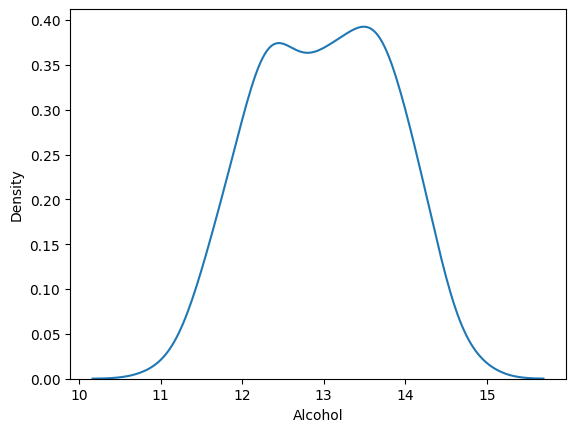

In [8]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

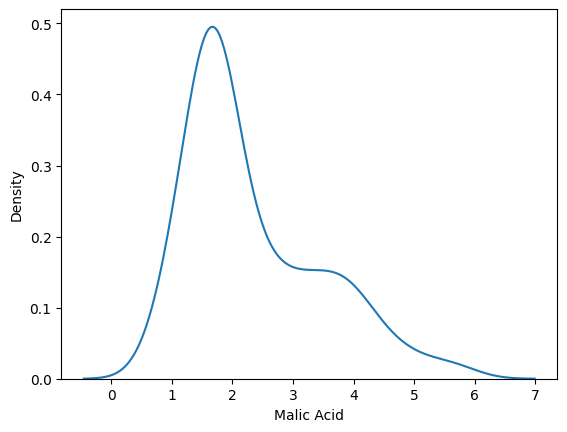

In [9]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

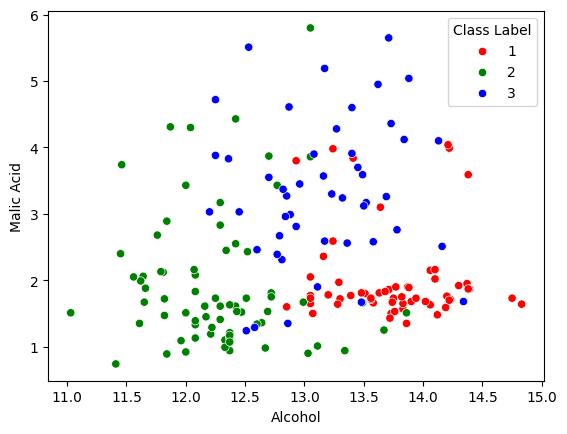

In [34]:
color_dict = {1:'red',2:'green',3:'blue'}
sns.scatterplot(data=df,x='Alcohol',y='Malic Acid',hue='Class Label',palette=color_dict)


## Splitting Dataset :-

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train , X_test, y_train , y_test = train_test_split(df.drop('Class Label',axis=1),
                                                      df['Class Label'],
                                                      test_size=0.3,
                                                      random_state=0)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 2)
(54, 2)
(124,)
(54,)


## MinMax Scaling :-

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

# Fit the scaler to the training set
scaler.fit(X_train)

# Transform Training and Testing Sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns= X_test.columns)

In [24]:
# For Non-Scaled Data:
round(X_train.describe(),2)

,Alcohol,Malic Acid
count,124.00,124.00
mean,12.98,2.38
std,0.80,1.14
min,11.03,0.89
25%,12.36,1.61
50%,13.04,1.88
75%,13.64,3.25
max,14.75,5.65


In [25]:
# For Scaled Data:
round(X_train_scaled.describe(),2)

,Alcohol,Malic Acid
count,124.00,124.00
mean,0.53,0.31
std,0.22,0.24
min,0.00,0.00
25%,0.36,0.15
50%,0.54,0.21
75%,0.70,0.50
max,1.00,1.00


Text(0.5, 1.0, 'After Scaling')

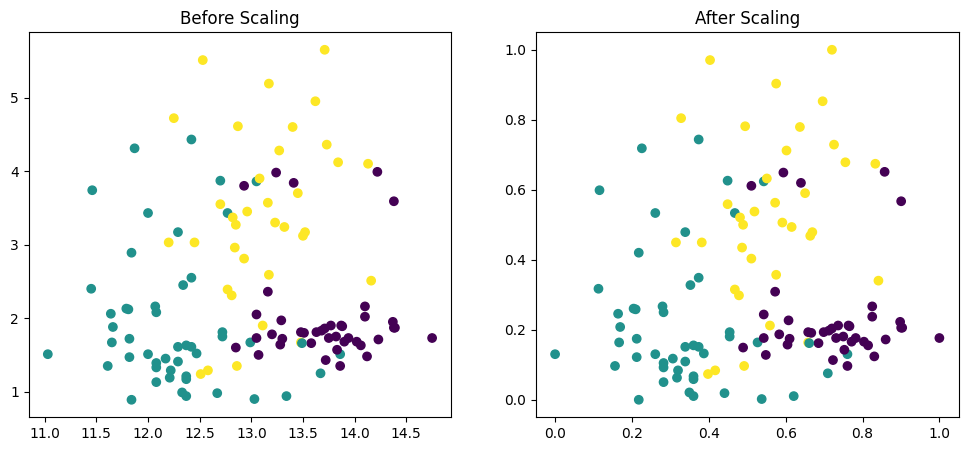

In [28]:
fig , (ax1, ax2) =  plt.subplots(ncols=2 , figsize=(12,5))

ax1.scatter(X_train['Alcohol'],X_train['Malic Acid'],c=y_train)
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic Acid'],c=y_train)
ax2.set_title("After Scaling")

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

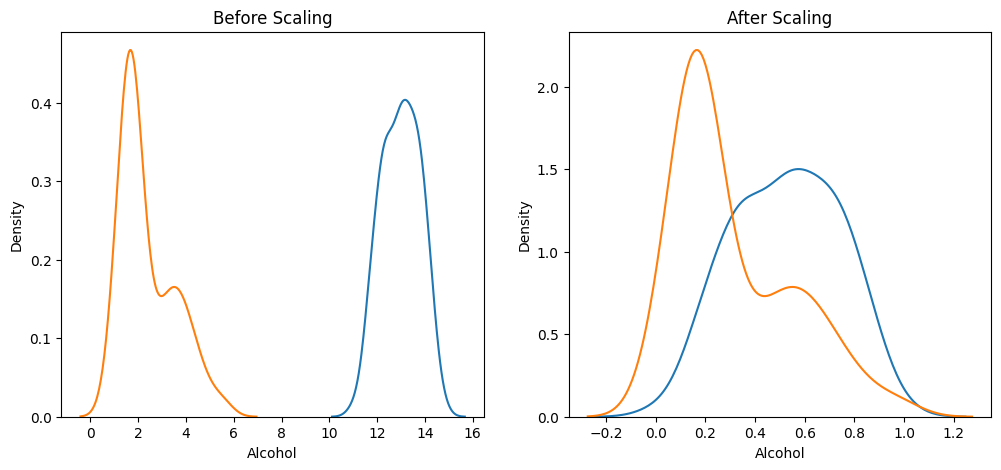

In [29]:
fig , (ax1, ax2) =  plt.subplots(ncols=2 , figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic Acid'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

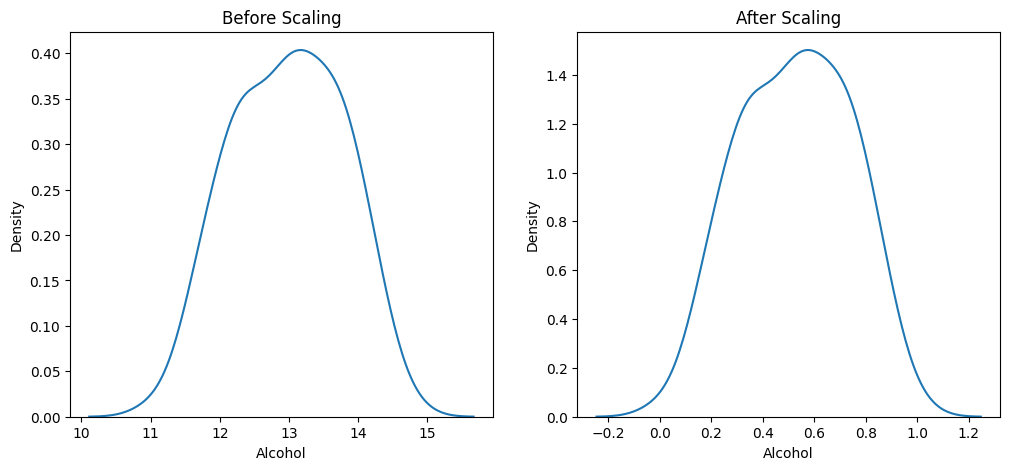

In [30]:
fig , (ax1, ax2) =  plt.subplots(ncols=2 , figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)

<Axes: title={'center': 'After Scaling'}, xlabel='Malic Acid', ylabel='Density'>

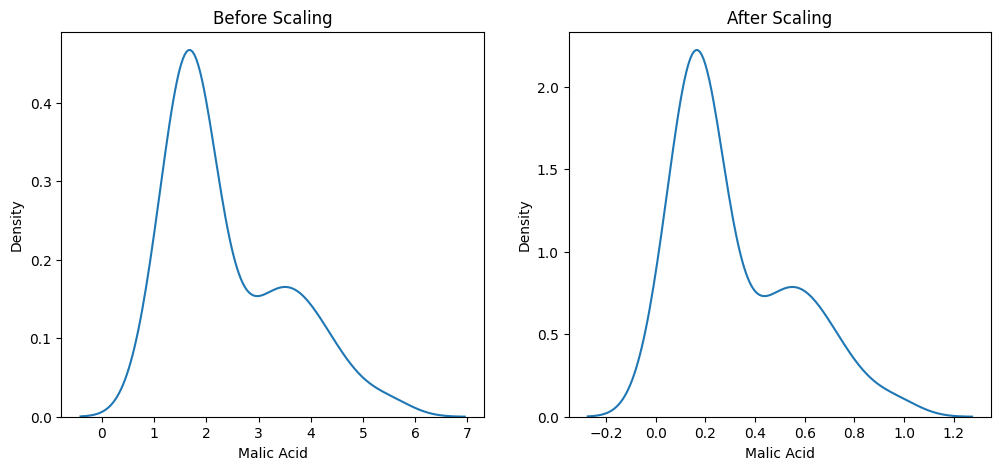

In [31]:
fig , (ax1, ax2) =  plt.subplots(ncols=2 , figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Malic Acid'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)

## Types of Normalization :

#### `MinMax Scaling` => Range of Output : [ 0 , 1 ]
```bash
X' = X - Xmin  / Xmax- Xmin
```         
---
#### `Mean Normalization` => Range of Output : [ -1 , 1 ]
```bash
X' = X - Xmean  / Xmax- Xmin
```  
---
#### `MaxAbs Scaling` => Often used for Sparse Data
```bash
X' = X / |Xmax|
```
---
#### `Robust Scaling` =>  Often used for Data with Outliers
```bash
X' = X - Xmedian / IQR
```